In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# Bayes Theorem

In probability theory and statistics, Bayes' theorem (alternatively Bayes' law or Bayes' rule), named after Reverend Thomas Bayes, describes the probability of an event, based on prior knowledge of conditions that might be related to the event. [1](https://plato.stanford.edu/archives/spr2019/entries/bayes-theorem/)

#### $$P(A|B) = \frac {P(B|A)P(A)}{P(B)}$$

I'm a visual learner. My favourite intuitive example of Bayes Theorem is this [using lego bricks](https://www.countbayesie.com/blog/2015/2/18/bayes-theorem-with-lego):

<img src="lego-probability-space.jpeg" width="400" height="400">

The image shows a 60 (6 * 10) lego unit area
 - 40 blue areas
 - 20 red areas
 - 6 intersecting yellow areas. 

We can work through the maths to determine the probabilities and conditional probabilities of each colour.

In [2]:
pBlue = 40/60
pRed = 20/60
pYellow = 6/60
pYellowRed = 4/20 # probabiity of Yellow given Red
pYellowBlue = 2 / 40 # probabiity of Yellow given Blue

print('Cond p(Yellow|Red) = {:.3f}'.format(pYellowRed))
print('Cond p(Yellow|Blue) = {:.3f}'.format(pYellowBlue))

Cond p(Yellow|Red) = 0.200
Cond p(Yellow|Blue) = 0.050


We now some baseline information for the probability and conditional probility of landing on each colour within the Legosphere. We can apply Bayes theorem to generate estimates for "if we land on a yellow brick, what is the probability its red underneath?"

$$P(A|B) = \frac {P(B|A)P(A)}{P(B)}$$

$$P(Red|Yellow) = \frac {P(Yellow|Red)P(Red)}{P(Yellow)}$$

In [3]:
pRedYellow = pYellowRed*pRed/pYellow
print('Cond p(Red|Yellow) = {:.3f}'.format(pRedYellow))

Cond p(Red|Yellow) = 0.667


## Bayesian Inference

The approach loosely follows:
 1. Evaluate prior assumptions and observational data. 
 1. Develop a probabilistic model of the data.
 1. Specify prior parameter values for the distributions of the probabilistic model.
 1. Apply Bayes’ theorem to derive the posterior parameter values. 


### Example: Coin Toss

Here we are testing wether our coin is bias. We have:
- prior belief of getting tails 0.5 $P(Prior)$
- 200 coin toss observations with 59 tails.

#### 1. Observational data and assumptions
We have a reasonable assumption that our prior probability of landing a tails $P(tails)$ is 0.5. However, we also some observational data. let's look. 

In [14]:
# prior belief
prior = 0.5

# observation data
trials = 200
tails = 59
heads = trials-tails
print(f"Trials:\t{trials}\ntails:\t{tails}\nheads:\t{heads}")
print(f'Observed P(tails) = {tails/trials}')

Trials:	200
tails:	59
heads:	141
Observed P(tails) = 0.295


#### 2. The Mathematical Model

In our coin tossing example the mathematical model is built to capture all of the processes, by means their distribution parameters, that generate the observational data (i.e. the generative process of Heads and Tails). With the probability of landing a head as θ

$$P(Y=1|θ)=θ$$
the probability of landing a tails is then:
$$P(Y=0|θ)=1-θ$$

You may recall that coin toss, and each instance above, is a single Bernoulli trial. Where each trial ends in Success or Failure, or Heads or Tails, Conversion or non-conersion, Survive or Die, you get the picture. Then, the [binomial distribution](https://www.statisticshowto.com/probability-and-statistics/binomial-theorem/binomial-distribution-formula/) is the probability mass function of multiple indepenent [bernoulli trials](https://www.unf.edu/~cwinton/html/cop4300/s09/class.notes/DiscreteDist.pdf). The binomial pmf describes the output of multiple coin tosses - our observation data. 

#### 3. The Prior Distribution
We have a reasonable assumption that the $P(Prior)$ is 0.5. But in the bayesian world we treat our assumptions as point estimates within possible range of values. We can use the traingle distribution to generate some estimates about our prior estimate.

In [290]:
def plot_p(ax,df,X,y,title,xlab='Theta',ylab='$P(theta)$'):
    """to plot data frames as point probability plots"""
    ax.set_title(f'{title} {ylab}')
    ax.vlines(df[X],0,df[y],'k')
    ax.plot(df[X],df[y],'ko', lw=5, alpha=0.6)
    ax.set_xticks(df[X])
    ax.set_xlabel(xlab)
    ax.set_ylabel(ylab);

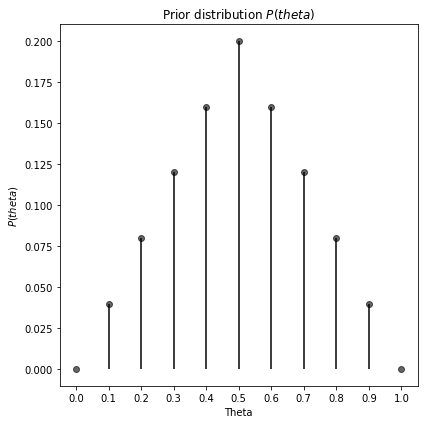

In [291]:
# prior estimates
from scipy.stats import triang

theta = np.arange(0,1.1,.1)
priors = triang.pdf(theta, prior)
priors = priors/sum(priors)
prior_df = pd.DataFrame({'theta':theta,'prior':priors})

fig,axs = plt.subplots(1,1,figsize=(6,6))
plot_p(axs,prior_df,'theta','prior','Prior distribution')
plt.tight_layout()

#### 4. Apply Bayes Rule

In [287]:
from scipy.stats import binom

In [295]:
trials, tails, heads = 10,7,3
trials, tails, heads

(10, 7, 3)

In [296]:
df = pd.DataFrame({'tails':tails,
                   'heads':heads,
                   'theta':theta,
                   'prior':priors,
                   'likelihood':[(x**tails) * (1-x)**heads for x in theta],
                   'binom':binom.pmf(tails,trials,theta),
                  })
df['marginal'] = np.sum(df['likelihood']*df['prior'])
df['posterior'] = (df['likelihood']*df['prior']) / df['marginal']
df

,tails,heads,theta,prior,likelihood,binom,marginal,posterior
0,7,3,0.0,0.00,0.000000e+00,0.000000,0.000968,0.000000
1,7,3,0.1,0.04,7.290000e-08,0.000009,0.000968,0.000003
2,7,3,0.2,0.08,6.553600e-06,0.000786,0.000968,0.000541
3,7,3,0.3,0.12,7.501410e-05,0.009002,0.000968,0.009296
4,7,3,0.4,0.16,3.538944e-04,0.042467,0.000968,0.058477
5,7,3,0.5,0.20,9.765625e-04,0.117188,0.000968,0.201707
6,7,3,0.6,0.16,1.791590e-03,0.214991,0.000968,0.296040
7,7,3,0.7,0.12,2.223566e-03,0.266828,0.000968,0.275564
8,7,3,0.8,0.08,1.677722e-03,0.201327,0.000968,0.138612
9,7,3,0.9,0.04,4.782969e-04,0.057396,0.000968,0.019758


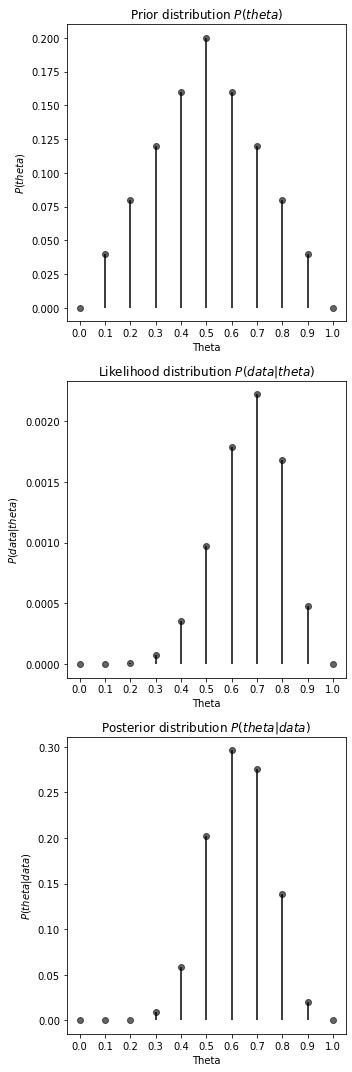

In [297]:
fig,axs = plt.subplots(3,1,figsize=(5,15))
plot_p(axs[0],df,'theta','prior','Prior distribution',ylab='$P(theta)$')
plot_p(axs[1],df,'theta','likelihood','Likelihood distribution',ylab='$P(data|theta)$')
plot_p(axs[2],df,'theta','posterior','Posterior distribution',ylab='$P(theta|data)$')
plt.tight_layout()

### references

- https://ro-che.info/articles/2016-06-14-predicting-coin-toss
- https://www.vosesoftware.com/riskwiki/Bayesiananalysisexampleidentifyingaweightedcoin.php
- https://www.analyticsvidhya.com/blog/2016/06/bayesian-statistics-beginners-simple-english/
- https://towardsdatascience.com/probability-concepts-explained-bayesian-inference-for-parameter-estimation-90e8930e5348
- https://www.ritchievink.com/blog/2019/06/10/bayesian-inference-how-we-are-able-to-chase-the-posterior/
- https://www.psychologicalscience.org/observer/bayes-for-beginners-probability-and-likelihood




#### Quick recap on the [Likelihood function](https://en.wikipedia.org/wiki/Likelihood_function#Example)

In [ ]:
# likelihood function 
# likelihood of two heads given x, p(HH|ph = x)
# https://en.wikipedia.org/wiki/Likelihood_function#Example
X = np.arange(0,1.1,0.1)
plt.plot(X,[x**2 for x in X]) # likelihood p(HH|x)
plt.plot(X,[(x**2)*(1-x)for x in X]) # likelihood p(HHT|x)
plt.plot(X,[(x**2)*(1-x)**2 for x in X]) # likelihood p(HHTT|x)